# 3D rekonstrukcija - Primer 2

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import lib.pg2d as pg2

## Tačke

### Vidljive tačke

In [21]:
x1 = np.array([764, 1391, 1])
y1 = np.array([362, 1111, 1])

x2 = np.array([758, 1079, 1])
y2 = np.array([595, 923, 1])

x3 = np.array([467, 1249, 1])
y3 = np.array([277, 870, 1])

x4 = np.array([656, 1097, 1])
y4 = np.array([412, 792, 1])

x5 = np.array([1262, 1179, 1])
y5 = np.array([867, 1268, 1])

x6 = np.array([1438, 688, 1])
y6 = np.array([1408, 1059, 1])

x8 = np.array([440, 919, 1])
y8 = np.array([505, 669, 1])

x9 = np.array([1305, 840, 1])
y9 = np.array([898, 839, 1])

x10 = np.array([1504, 296, 1])
y10 = np.array([1502, 624, 1])

x11 = np.array([637, 61, 1])
y11 = np.array([1051, 74, 1])

x12 = np.array([381, 558, 1])
y12 = np.array([501, 233, 1])

x13 = np.array([995, 607, 1])
y13 = np.array([859, 541, 1])

x14 = np.array([1220, 549, 1])
y14 = np.array([1071, 620, 1])

y15 = np.array([1163, 488, 1])

x16 = np.array([919, 424, 1])

x17 = np.array([1000, 465, 1])
y17 = np.array([875, 375, 1])

x18 = np.array([1237, 407, 1])
y18 = np.array([1096, 456, 1])

x19 = np.array([1149, 221, 1])
y19 = np.array([1183, 312, 1])

x20 = np.array([925, 280, 1])
y20 = np.array([972, 235, 1])

Xs = [x1, x2, x3, x4, x9, x10, x11, x12]
Ys = [y1, y2, y3, y4, y9, y10, y11, y12]

### Nevidljive tačke

In [22]:
def cross(a, b):

    c1 = int(a[1]) * int(b[2]) - int(a[2]) * int(b[1])
    c2 = int(a[2]) * int(b[0]) - int(a[0]) * int(b[2]) 
    c3 = int(a[0]) * int(b[1]) - int(a[1]) * int(b[0])

    return [c1,c2,c3]

def invisible_point(L1, L2, L3, L4, X1, X2):

    cross_product = np.array(cross(
        cross (
            cross(cross(L1[0], L1[1]), cross(L2[0], L2[1])), X1
        ),
        cross (
            cross(cross(L3[0], L3[1]), cross(L4[0], L4[1])), X2
        )
    ))
    
    cross_product = cross_product / cross_product[-1]

    return cross_product


In [23]:
x7 = invisible_point((x11, x12), (x9, x10), (x10, x11), (x9, x12), x8, x6)
y7 = invisible_point((y11, y12), (y9, y10), (y10, y11), (y9, y12), y8, y6)
x15 = invisible_point((x17, x20), (x18, x19), (x17, x18), (x19, x20), x14, x16)
y16 = invisible_point((x19, x20), (x17, x18), (x17, x20), (x18, x19), x15, x13)

## Formiranje fundamentalne matrice

In [24]:
A = None
for ((a1, a2, a3), (b1, b2, b3)) in zip(Xs, Ys):
    a = np.array(
            [a1 * b1 , a2 * b1 , a3 * b1, a1 * b2 , a2 * b2 , a3 * b2 , a1 * b3 , a2 * b3 , a3 * b3]
        )
    
    if A is None:
        A = a   
    else:
        A = np.vstack((A, a))

print(A)

[[ 276568  503542     362  848804 1545401    1111     764    1391       1]
 [ 451010  642005     595  699634  995917     923     758    1079       1]
 [ 129359  345973     277  406290 1086630     870     467    1249       1]
 [ 270272  451964     412  519552  868824     792     656    1097       1]
 [1171890  754320     898 1094895  704760     839    1305     840       1]
 [2259008  444592    1502  938496  184704     624    1504     296       1]
 [ 669487   64111    1051   47138    4514      74     637      61       1]
 [ 190881  279558     501   88773  130014     233     381     558       1]]


In [25]:
F = np.linalg.svd(A)[2][-1].reshape((3,3))
print("Fundamentalna matrice F:\n", F)

Fundamentalna matrice F:
 [[ 1.07656908e-07  5.04474125e-08 -1.10200094e-03]
 [-1.56285476e-07  3.04341286e-08  1.19528768e-03]
 [ 1.40736879e-04 -1.44221058e-03  9.99997629e-01]]


## Testiranje osobina fundamentalne matrice

In [26]:
print(np.array(list(map(
    lambda P : P[1] @ F @ P[0],
    zip(Xs, Ys)
))))

[-2.22044605e-16 -1.84297022e-14 -5.19584376e-14 -7.99360578e-15
  7.32747196e-15  7.91033905e-14  3.27654570e-14 -1.56541446e-14]


***Dobijamo nula vektor (sa numeričkom greškom)***

In [27]:
np.linalg.det(F)

-3.8435137954314543e-14

***Determinanta je takođe 0 (uz numeričku grešku)***

## Nalaženje epipolova

In [28]:
e1 = np.linalg.svd(F)[2][-1]
e1 = e1/e1[2]
print("Epipol e1:\n", e1)

Epipol e1:
 [8.53789971e+03 1.52654198e+03 1.00000000e+00]


In [29]:
e2 = np.transpose(np.linalg.svd(F)[0])[-1]
e2 = e2 / e2[2]
print("Epipol e2:\n", e2)

Epipol e2:
 [1.78335964e+04 1.56051490e+04 1.00000000e+00]


## Ispravljanje preciznosti fundamentalne matrice

In [30]:
U , D, Vt = np.linalg.svd(F)
D1 = np.diag([1,1,0]) @ np.diag(D)

F1 = U @ D1 @ Vt

print("Modifikovana fundamentalna matrica F1:\n", F1)

Modifikovana fundamentalna matrica F1:
 [[ 1.19667905e-07  5.25949304e-08 -1.10200094e-03]
 [-1.45775346e-07  3.23132973e-08  1.19528768e-03]
 [ 1.40736880e-04 -1.44221058e-03  9.99997629e-01]]


In [31]:
np.linalg.det(F1)

1.3380642581897602e-28

***Za determinantu smo ponovo dobili nulu ali sa manjom numeričkom greškom.***

## Rekonstrukcija skrivenih tačaka

In [32]:
T1 = np.transpose(np.vstack((np.eye(3), np.zeros(3))))
print("Matrica prve kamere:\n", T1)

Matrica prve kamere:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [33]:
E2 = np.array([
    [0, -e2[2], e2[1]],
    [e2[2], 0, -e2[0]],
    [-e2[1], e2[0], 0]
])

T2 = np.transpose(np.vstack((np.transpose(E2 @ F1), e2)))
print("Matrica druge kamere:\n", T2)

Matrica druge kamere:
 [[ 2.19622013e+00 -2.25059111e+01  1.56051108e+04  1.78335964e+04]
 [-2.50984460e+00  2.57198015e+01 -1.78335552e+04  1.56051490e+04]
 [-4.46713419e-03 -2.44489424e-04  3.85131670e+01  1.00000000e+00]]


In [34]:
def jednacina(X, Y, T1, T2):
    return np.array(
        [ X[1] * T1[2] - X[2] * T1[1], 
          -X[0] * T1[2] + X[2] * T1[0],
          Y[1] * T2[2] - Y[2] * T2[1],
          -Y[0] * T2[2] + Y[2] * T2[0]
        ]
    )

In [35]:
image1 = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20]
image2 = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19, y20]

points = np.array( list ( map ( lambda P : P[:-1], # Uklanjamo pretvaramo u afine koordinate

    map ( lambda P : P / P[-1], # Svodimo na kanonski oblik

        map ( lambda P : np.linalg.svd(jednacina(P[0], P[1], T1, T2))[2][-1], # Racunamo tacku
            zip(image1, image2)
        )
    )
)))

print("Tacke u prostoru:\n", points)


Tacke u prostoru:
 [[4.96705176e+02 9.12110878e+02 6.50260258e-01]
 [4.65994044e+02 6.70957767e+02 6.15243004e-01]
 [3.79010807e+02 1.01908111e+03 8.11926599e-01]
 [5.10447374e+02 8.60414938e+02 7.78600079e-01]
 [5.77878805e+02 5.52782957e+02 4.58226675e-01]
 [5.61885946e+02 2.74647613e+02 3.91155209e-01]
 [3.88092864e+02 2.65116192e+02 5.86061174e-01]
 [3.37399903e+02 7.09501281e+02 7.67497614e-01]
 [7.34027162e+02 4.84728415e+02 5.63189102e-01]
 [6.79376109e+02 1.46663135e+02 4.52985061e-01]
 [4.85515611e+02 5.12054664e+01 7.63462392e-01]
 [4.53292047e+02 6.67842989e+02 1.19077192e+00]
 [6.62511783e+02 4.17612124e+02 6.67168688e-01]
 [6.84521078e+02 3.20300206e+02 5.62188198e-01]
 [6.40212650e+02 2.22489999e+02 5.63918843e-01]
 [6.22190682e+02 3.26109537e+02 6.80552595e-01]
 [7.39750501e+02 3.61307622e+02 7.41695026e-01]
 [7.52475794e+02 2.62980485e+02 6.09873081e-01]
 [7.08380110e+02 1.53727350e+02 6.18715727e-01]
 [6.91608919e+02 2.25061926e+02 7.49964469e-01]]


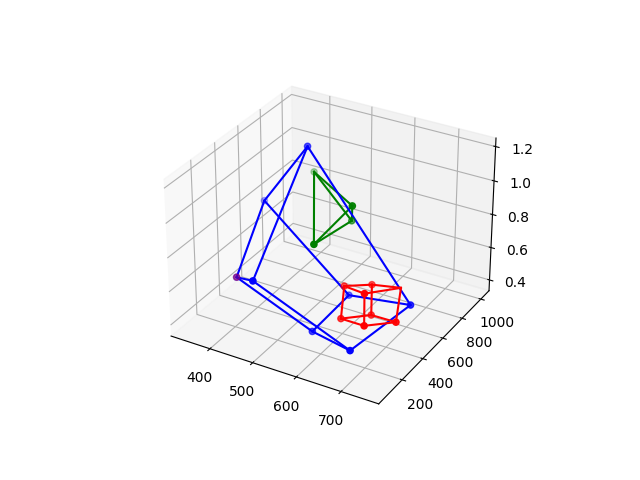

In [36]:
box1 = np.array([points[0], points[1], points[2], points[3]])
box2 = np.array([points[4], points[5], points[6], points[7], points[8], points[9], points[10], points[11]])
box3 = np.array([points[12], points[13], points[14], points[15], points[6], points[17], points[18], points[19]])

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(box1[:,0], box1[:,1], box1[:,2], color='green')
ax.scatter(box2[:,0], box2[:,1], box2[:,2], color='blue')
ax.scatter(box3[:,0], box3[:,1], box3[:,2], color='red')

edges1 = [
    (1, 2),
    (2, 3),
    (3, 1),
    (1, 4),
    (2, 4),
    (3, 4)
]

edges2 = [
    (5, 6),
    (6, 7), 
    (7, 8),
    (8, 5),
    (9, 10),
    (10, 11),
    (11, 12), 
    (12, 9),
    (5, 9),
    (6, 10), 
    (7, 11),
    (8, 12)
]

edges3 = [
    (13, 14),
    (14, 15),
    (15, 16),
    (16, 13),
    (17, 18),
    (18, 19),
    (19, 20),
    (20, 17),
    (13, 17),
    (14, 18),
    (15, 19),
    (16, 20)
]

# Box1
for (p1, p2) in edges1:
    p1 -= 1
    p2 -= 1
    ax.plot(
        [points[p1][0], points[p2][0]],
        [points[p1][1], points[p2][1]],
        [points[p1][2], points[p2][2]],
        color='green'
    )


# Box2
for (p1, p2) in edges2:
    p1 -= 1
    p2 -= 1
    ax.plot(
        [points[p1][0], points[p2][0]],
        [points[p1][1], points[p2][1]],
        [points[p1][2], points[p2][2]],
        color='blue'
    )

    # Box2
for (p1, p2) in edges3:
    p1 -= 1
    p2 -= 1
    ax.plot(
        [points[p1][0], points[p2][0]],
        [points[p1][1], points[p2][1]],
        [points[p1][2], points[p2][2]],
        color='red'
    )